# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# install citipy abd requests
!pip install citipy
!pip install requests

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nguigmi
Processing Record 2 of Set 1 | yola
Processing Record 3 of Set 1 | tucumcari
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | manicore
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | rehoboth
Processing Record 11 of Set 1 | hoemul-li
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | taltal
Processing Record 15 of Set 1 | odzak
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | conduaga
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | arno
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | dul'durga
Processing Record 22 of Set 1 | fangshan
Process

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nguigmi,14.2495,13.1092,37.04,30,38,2.64,NE,1720101275
1,yola,9.2000,12.4833,35.04,38,80,2.84,NG,1720101277
2,tucumcari,35.1717,-103.7250,20.91,64,0,2.57,US,1720101279
3,udachny,66.4167,112.4000,13.91,47,5,2.38,RU,1720101281
4,manicore,-5.8092,-61.3003,32.50,50,35,1.07,BR,1720101283


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nguigmi,14.2495,13.1092,37.04,30,38,2.64,NE,1720101275
1,yola,9.2000,12.4833,35.04,38,80,2.84,NG,1720101277
2,tucumcari,35.1717,-103.7250,20.91,64,0,2.57,US,1720101279
3,udachny,66.4167,112.4000,13.91,47,5,2.38,RU,1720101281
4,manicore,-5.8092,-61.3003,32.50,50,35,1.07,BR,1720101283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

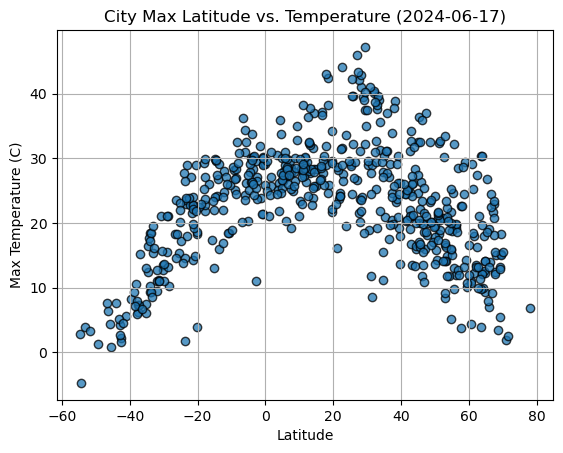

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

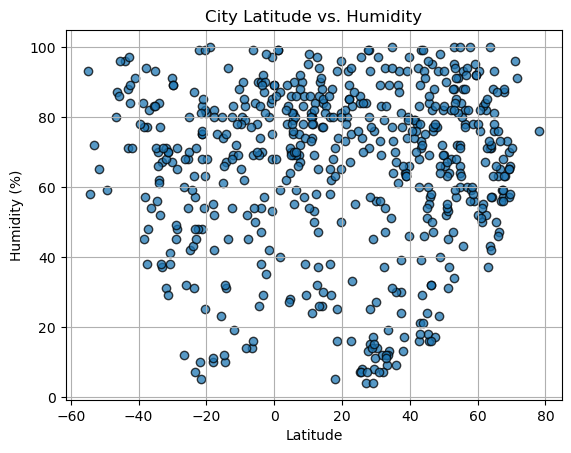

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

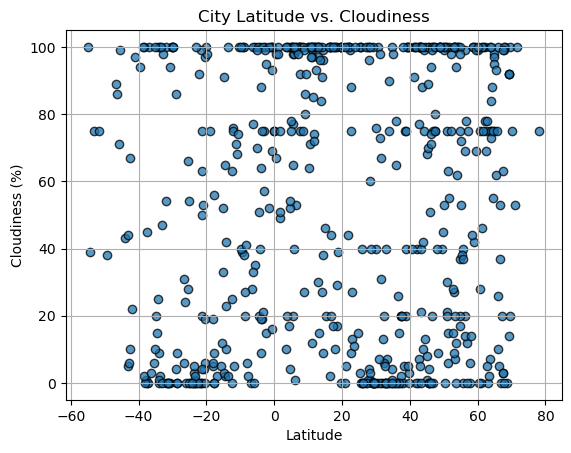

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

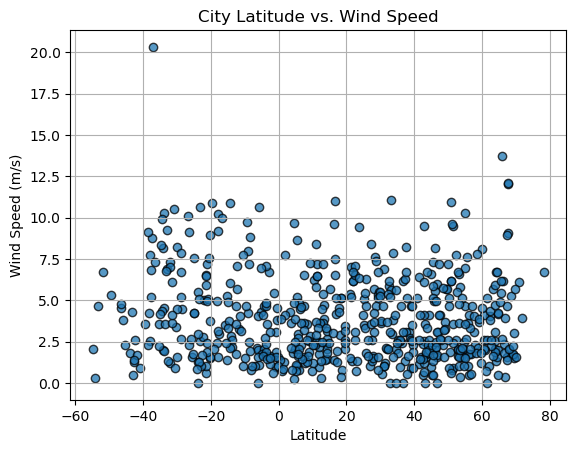

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"


    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    print(f"r-squared: {rvalue**2:.2f}")

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nguigmi,14.2495,13.1092,37.04,30,38,2.64,NE,1720101275
1,yola,9.2000,12.4833,35.04,38,80,2.84,NG,1720101277
2,tucumcari,35.1717,-103.7250,20.91,64,0,2.57,US,1720101279
3,udachny,66.4167,112.4000,13.91,47,5,2.38,RU,1720101281
6,hami,42.8000,93.4500,31.12,16,7,2.54,CN,1720101286


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,manicore,-5.8092,-61.3003,32.50,50,35,1.07,BR,1720101283
5,margaret river,-33.9500,115.0667,10.31,84,9,4.53,AU,1720101284
7,grytviken,-54.2811,-36.5092,-4.73,58,39,0.28,GS,1720101288
8,invercargill,-46.4000,168.3500,6.37,87,86,4.53,NZ,1720101290
9,rehoboth,-23.3167,17.0833,22.97,7,1,2.54,NaN,1720101292


###  Temperature vs. Latitude Linear Regression Plot

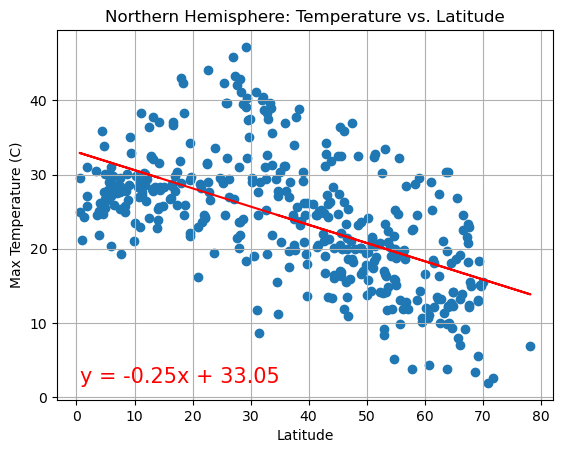

r-squared: 0.33


In [44]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Latitude", "Max Temperature (C)",
    "Northern Hemisphere: Temperature vs. Latitude",
    "output_data/NH_Temperature_vs_Latitude.png")

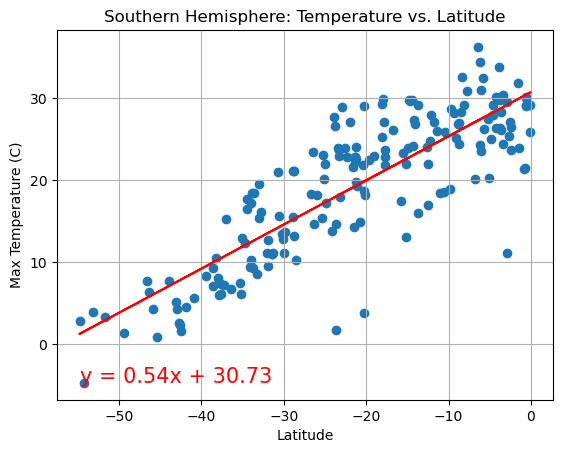

r-squared: 0.71


In [46]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Latitude", "Max Temperature (C)",
    "Southern Hemisphere: Temperature vs. Latitude",
    "output_data/SH_Temperature_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

In [ ]:
#In the Northern Hemisphere, there is a negative correlation between temperature and latitude. As latitude increases, the temperature generally decreases. While in the Southern Hemisphere, there is a positive correlation between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

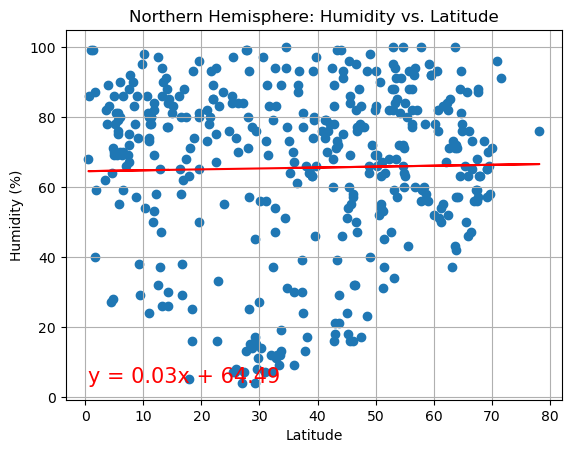

r-squared: 0.00


In [47]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Northern Hemisphere: Humidity vs. Latitude",
    "output_data/NH_Humidity_vs_Latitude.png"
)

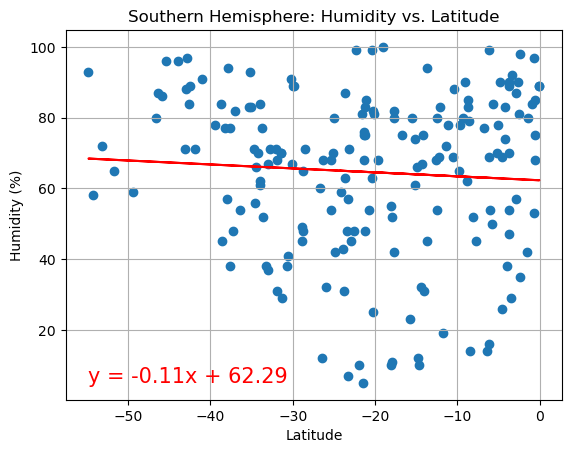

r-squared: 0.00


In [49]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Southern Hemisphere: Humidity vs. Latitude",
    "output_data/SH_Humidity_vs_Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In both Southern and Northern Hemisphere, the scatter plot shows the relationship between humidity and latitude. The linear regression line is almost flat, indicating a very weak correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

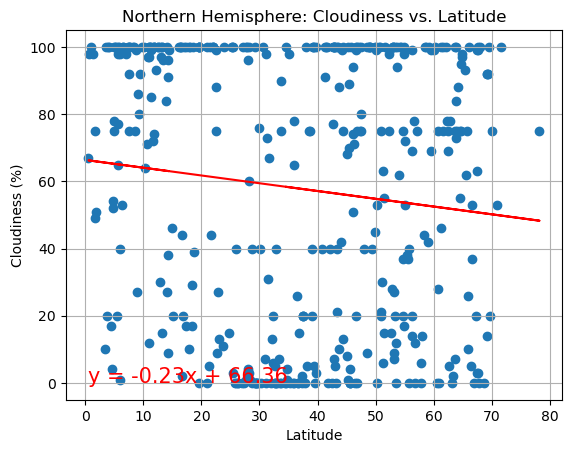

r-squared: 0.01


In [50]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness (%)",
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "output_data/NH_Cloudiness_vs_Latitude.png"
)

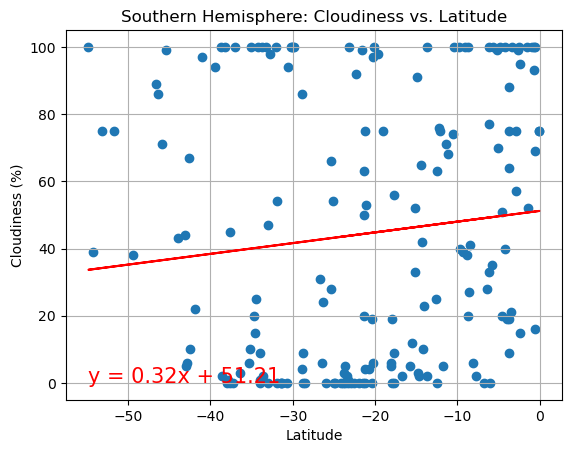

r-squared: 0.01


In [51]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness (%)",
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "output_data/SH_Cloudiness_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In the Northern Hemisphere, the scatter plot shows the relationship between cloudiness and latitude. The linear regression line has a slight negative slope, indicating a weak negative correlation between cloudiness and latitude. While the Southern Hemisphere, the linear regression line has a slight positive slope, indicating a weak positive correlation 

### Wind Speed vs. Latitude Linear Regression Plot

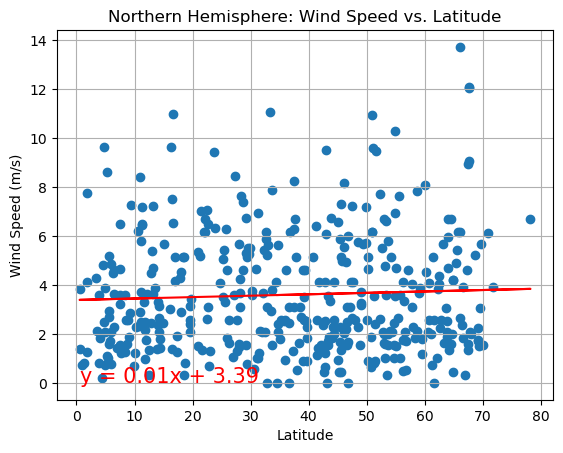

r-squared: 0.00


In [52]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed (m/s)",
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "output_data/NH_Wind_Speed_vs_Latitude.png"
)

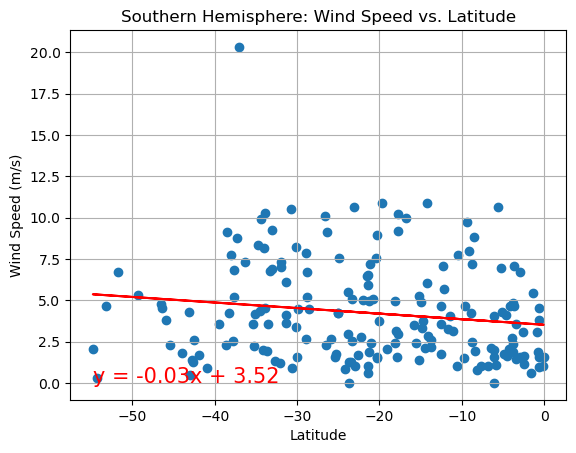

r-squared: 0.02


In [53]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed (m/s)",
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "output_data/SH_Wind_Speed_vs_Latitude.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
## In both Southern and Northern Hemisphere, the scatter plot shows the relationship between  Wind Speed vs. Latitude. The linear regression line is almost flat, indicating a very weak correlation between humidity and latitude.